In [28]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# import data from GG Sheet

In [29]:
## original data https://docs.google.com/spreadsheets/d/14GmNx-6YkTfOSYfjQqGw-wC6h9VPqB3frw-ovtMTN5A/edit?pli=1#gid=0

In [30]:
## sheet สถานภาพเครื่องแม่ข่าย_และอุปกรณ์ต่อพ่วง_PoPNix owner P'Pooooo

SHEET_ID = '14GmNx-6YkTfOSYfjQqGw-wC6h9VPqB3frw-ovtMTN5A'
SHEET_NAME = 'status'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
df = pd.read_csv(url)
df # print(df.head())

,No.,List Devices,Serial Number,Health Check,Clean Check,Unnamed: 5,Unnamed: 6
0,1,Private Cloud 1,9FRQ8F3,True,True,NaN,NaN
1,2,Private Cloud 2,BFRQ8F3,True,True,NaN,NaN
2,3,Private Cloud 3,CFRQ8F3,True,True,NaN,NaN
3,4,Big data Data node 1,DFRQ8F3,True,True,NaN,NaN
4,5,Big data Data node 2,FFRQ8F3,False,True,NaN,NaN
5,6,Big data Data node 3,GFRQ8F3,True,True,NaN,NaN
6,7,Frontend server1,DK0V8F3,True,True,NaN,NaN
7,8,Frontend server2,8GLRDT3,True,True,NaN,NaN
8,9,Backup Server,GGRQ8F3,True,True,NaN,NaN
9,10,Network L3 Switch 1,HPP363,True,True,NaN,NaN


In [32]:
lst_device = df['List Devices']
lst_device

0            Private Cloud 1
1            Private Cloud 2
2            Private Cloud 3
3       Big data Data node 1
4       Big data Data node 2
5       Big data Data node 3
6           Frontend server1
7           Frontend server2
8              Backup Server
9        Network L3 Switch 1
10       Network L3 Switch 2
11         Network L2 Switch
12    Deep Learning Server 1
13    Deep Learning Server 2
Name: List Devices, dtype: object

In [15]:
lst_health = df['Health Check']
lst_health

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Health Check, dtype: bool

In [16]:
lst_clean = df['Clean Check']
lst_clean

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Clean Check, dtype: bool

In [23]:
lst_clean[1]

True

In [17]:
status = df['Health Check'][1]
status

True

# Print figure for Health Check

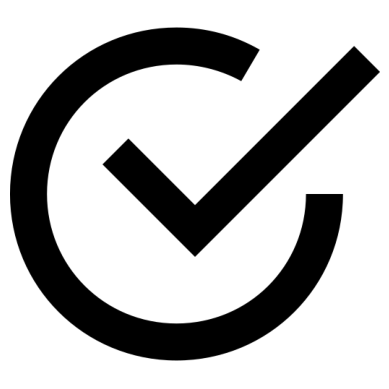

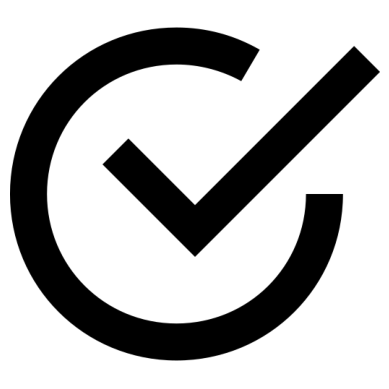

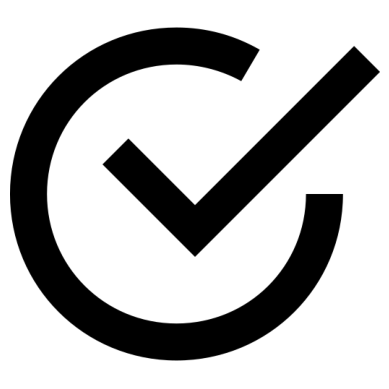

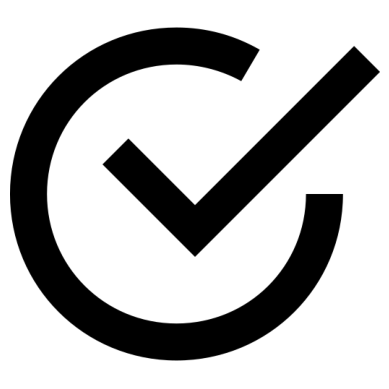

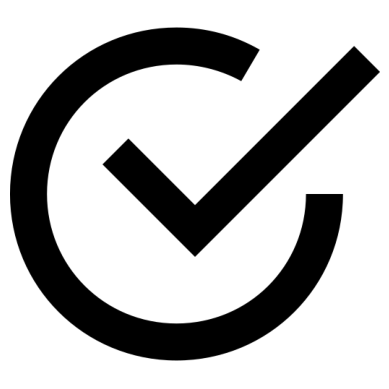

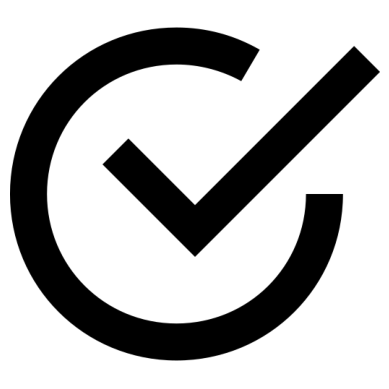

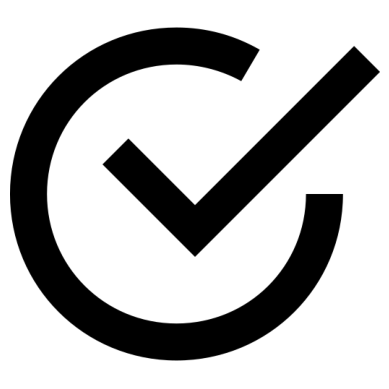

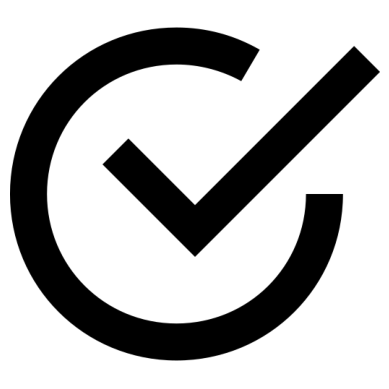

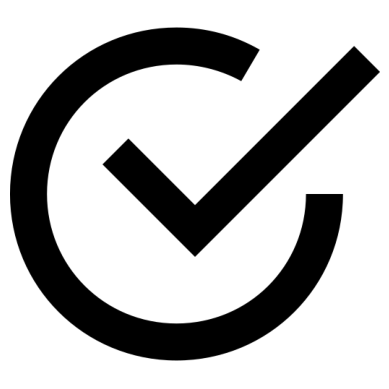

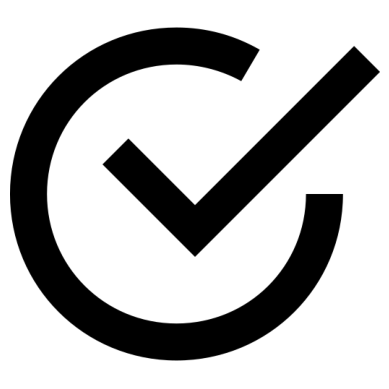

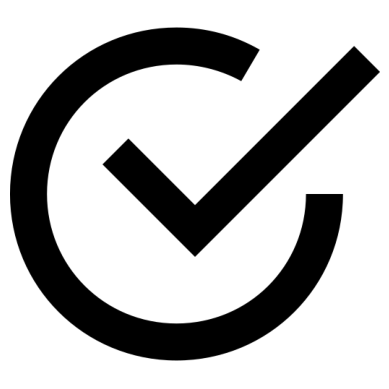

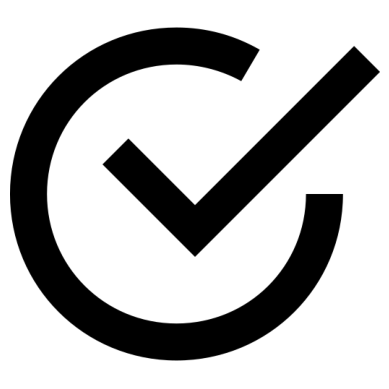

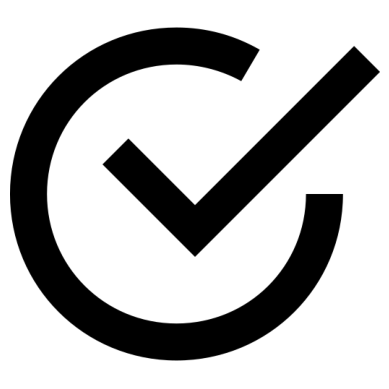

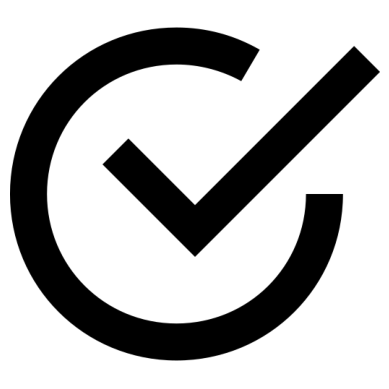

In [18]:
# Replace 'path/to/your/image.jpg' with the actual path to your image file
# image_pass =  './sections/Zabbix/Image/pass.png'
# image_not_pass =  './sections/Zabbix/Image/not_pass.png'
image_pass = 'C:/Users/jdpsk/OneDrive/Desktop/ST/report_water/pass.png'
image_not_pass = 'C:/Users/jdpsk/OneDrive/Desktop/ST/report_water/not_pass.png'

# Open the image using Pillow
img_pass = Image.open(image_pass)
img_not_pass = Image.open(image_not_pass)

def show_img(status):
    if status == True:
        img = img_pass
    else: img = img_not_pass
    return img

# Display 10 figures using a for loop
for i in lst_health:
    img = show_img(i)
    plt.figure()  # Create a new figure
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels

# # # Show all figures
plt.show()


# Print Figure for Clean check

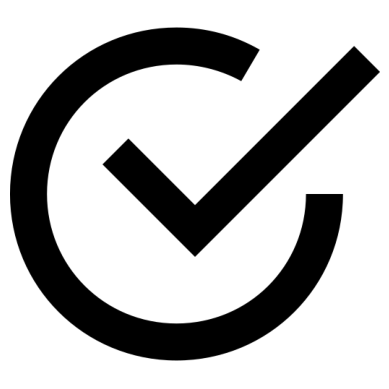

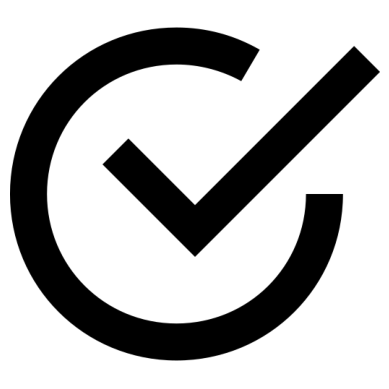

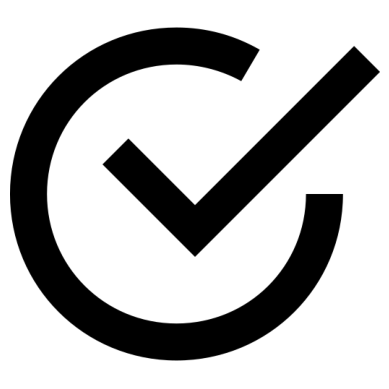

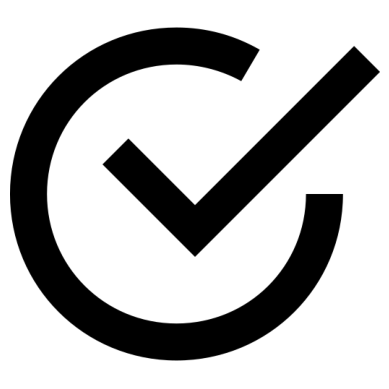

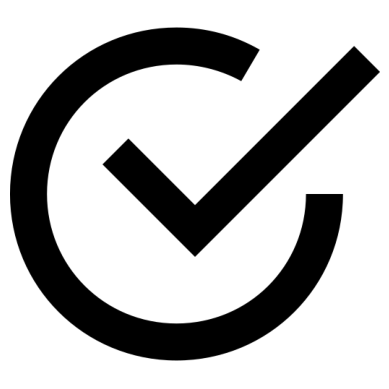

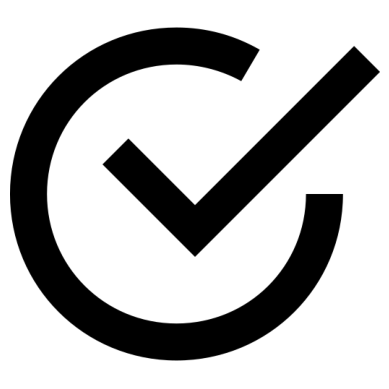

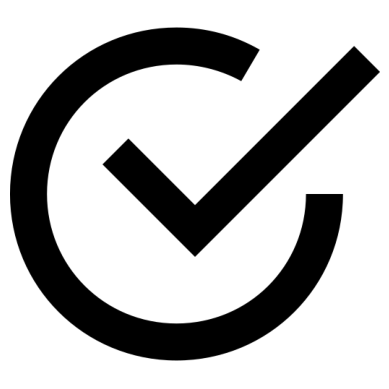

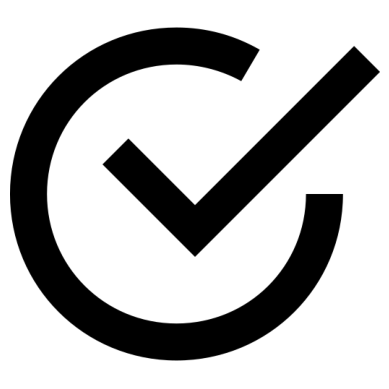

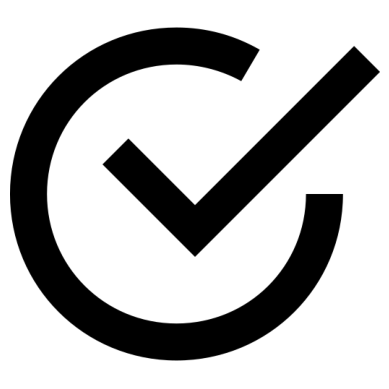

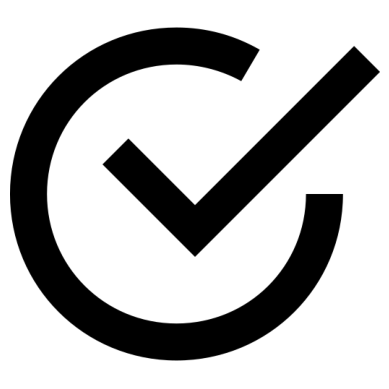

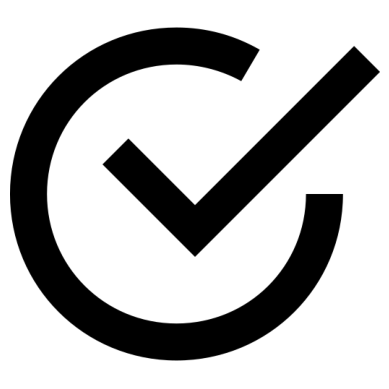

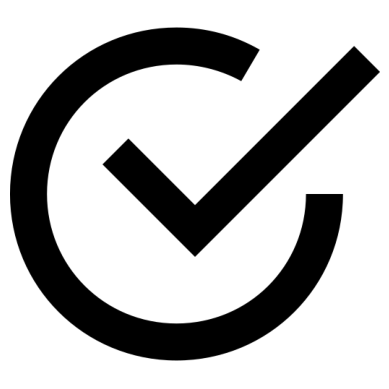

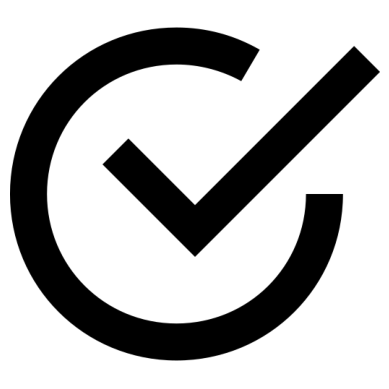

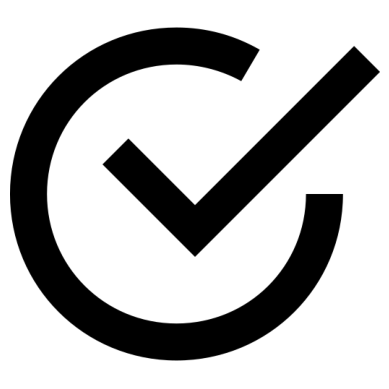

In [19]:
# Replace 'path/to/your/image.jpg' with the actual path to your image file
# image_pass =  './sections/Zabbix/Image/pass.png'
# image_not_pass =  './sections/Zabbix/Image/not_pass.png'
image_pass = 'C:/Users/jdpsk/OneDrive/Desktop/ST/report_water/pass.png'
image_not_pass = 'C:/Users/jdpsk/OneDrive/Desktop/ST/report_water/not_pass.png'

# Open the image using Pillow
img_pass = Image.open(image_pass)
img_not_pass = Image.open(image_not_pass)

def show_img(status):
    if status == True:
        img = img_pass
    else: img = img_not_pass
    return img

# Display 10 figures using a for loop
for i in lst_clean:
    img = show_img(i)
    plt.figure()  # Create a new figure
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels

# # # Show all figures
plt.show()


# Print only one figure

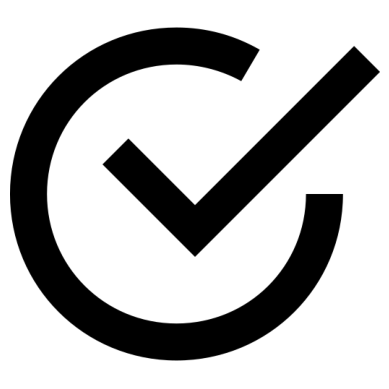

In [20]:
def show_img(status):
    if status == True:
        img = img_pass
    else: img = img_not_pass
    
    return img

result = show_img(lst_clean[1])
plt.figure()  # Create a new figure
plt.imshow(result)
plt.axis('off')  # Turn off axis labels

# # # Show all figures
plt.show()